CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from utils import device, build_loader
from model import Net

CODE BLOCK: 2

CODE BLOCK: 3

In [2]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [4]:
batch_size = 512
train_loader, test_loader = build_loader(batch_size, train_data, test_data)

CODE BLOCK: 6

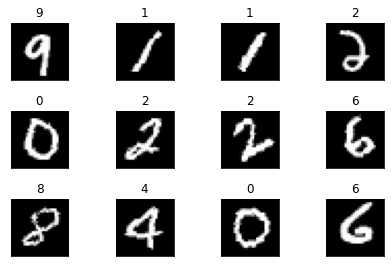

In [5]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [7]:
# !pip install torchsummary
from torchsummary import summary

kwargs = {'device': device}
model = Net(**kwargs).to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [8]:
kwargs = {'bias': False, 'device': device}
model = Net(**kwargs).to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


CODE BLOCK: 8

In [9]:
# Data to plot accuracy and loss graphs
# train_losses = []
# test_losses = []
# train_acc = []
# test_acc = []

# test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [11]:
kwargs = {'device': device}
model = Net(**kwargs).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)

criterion = F.nll_loss
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model.model_train(train_loader, optimizer, criterion)
  model.model_test(test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2051 Batch_id=117 Accuracy=50.78: 100%|██████████| 118/118 [00:32<00:00,  3.68it/s]


Test set: Average loss: 0.1966, Accuracy: 9430/10000 (94.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1402 Batch_id=117 Accuracy=94.28: 100%|██████████| 118/118 [00:37<00:00,  3.13it/s]


Test set: Average loss: 0.0854, Accuracy: 9727/10000 (97.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0718 Batch_id=117 Accuracy=96.43: 100%|██████████| 118/118 [00:34<00:00,  3.47it/s]


Test set: Average loss: 0.0612, Accuracy: 9801/10000 (98.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1285 Batch_id=117 Accuracy=97.07: 100%|██████████| 118/118 [00:36<00:00,  3.25it/s]


Test set: Average loss: 0.0521, Accuracy: 9828/10000 (98.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0551 Batch_id=117 Accuracy=97.48: 100%|██████████| 118/118 [00:35<00:00,  3.37it/s]


Test set: Average loss: 0.0396, Accuracy: 9863/10000 (98.63%)

Adjusting learning rate of group 0 to 1.0000e-02.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

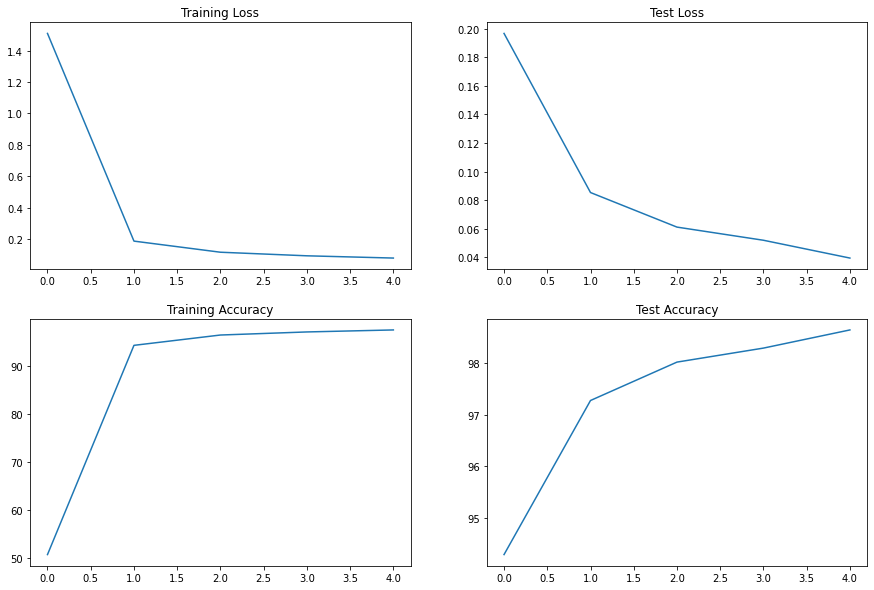

In [12]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model.test_acc)
axs[1, 1].set_title("Test Accuracy")